```{image} ../images/logos/openradar_logo.svg
:width: 200px
:align: center
```

# Introducción a los radares meteorológicos y xradar

---

## 1. Introducción

En este cuadernillo aprenderás a trabajar con datos de **radares meteorológicos** usando la librería **[xradar](https://docs.openradarscience.org/projects/xradar/en/stable/)**.

Xradar es una herramienta moderna y de código abierto, diseñada para importar, estructurar y preparar datos de radar para análisis cientifico utilizando el ecosistema de Python — en particular `xarray` y formatos como `Zarr`.

📦 **¿Qué hace Xradar?**

- Lee múltiples formatos de radar (e.g. SIGMET, ODIM_H5, Cf/Radial, Rainbow, NEXRAD).
- Organiza los datos en un modelo jerárquico compatible con el estándar WMO **FM301 / CfRadial2.1**.
- Permite el acceso estructurado y el análisis directo de múltiples variables radar como `Z`, `ZDR`, `VEL`, entre otras.
- Facilita la visualización, exportación y análisis de grandes volúmenes de datos usando herramientas como `matplotlib`, `cartopy` o `dask`.

Este módulo está pensado como punto de entrada al análisis de radar meteorológico basado en etiquetas, coordenadas geográficas y estándares abiertos.

## 📚 ¿Qué vas a aprender?

Al completar este cuadernillo serás capaz de:
- Leer archivos de radar en distintos formatos (SIGMET, NetCDF, ODIM, etc.)
- Visualizar datos de reflectividad y otras variables polarimétricas
- Georreferenciar datos para crear mapas con coordenadas reales
- Aplicar filtros y seleccionar datos por rangos, azimut o elevación
- Comparar el flujo de trabajo entre Py-ART, Xradar y Wradlib
- Utilizar objetos `xarray.DataArray`, `Dataset`, y `DataTree` para datos de radar

## ✅ Requisitos previos

| Concepto                                | Importancia | Notas                                   |
|-----------------------------------------|-------------|------------------------------------------|
| [NumPy](./1.2.Introduccion-Numpy.ipynb) | Necesario   | Estructuras y operaciones con arrays     |
| [Xarray](./1.4.Introduccion-Xarray.ipynb) | Necesario | Acceso por coordenadas, etiquetado, `.plot()` |
| [Matplotlib](https://matplotlib.org/)   | Necesario   | Generación de figuras                    |
| [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) | Necesario | Visualización geográfica                 |
| [Radar Cookbook](https://projectpythia.org/radar-cookbook/index.html) | Sugerido | Casos de uso adicionales                 |

⏱️ **Tiempo estimado de aprendizaje**: 30–45 minutos  
✍️ **Formato**: interactivo, ejecuta y modifica el código a medida que avanzas

## 2. ¿Cómo funcionan los radares meteorológicos? 🎬 
---
Antes de explorar `xradar` es útil entender cómo opera un radar meteorológico.

A continuación te presentamos un video explicativo sobre el proceso de escaneo volumétrico que realiza un radar:

:::{iframe} https://www.youtube.com/embed/Yrq2TVdM8HI
:width: 70%
Operacion de un radar meteorológico. Fuente:[UCAR](https://www.meted.ucar.edu/index.php)
:::


### 🌀 **¿Qué estás viendo?**

- El radar gira 360° a una altura fija, recolectando datos como **reflectividad** — útiles para visualizar la precipitación.
- Luego se inclina a un ángulo más alto y repite el proceso.
- Estas múltiples barridas crean un patrón volumétrico llamado **Patrón de Cobertura de Volumen (VCP)** con forma de dona 🍩.
- Este ciclo se repite cada pocos minutos, permitiendo realizar **análisis en series de tiempo** y seguimiento de tormentas.

🎓 *Este contexto es clave para entender cómo procesar e interpretar los datos en las siguientes secciones.*

## 3. Xradar: Radar meteorológicos representados en Xarray 🛰️
--- 
Xradar es una librería moderna diseñada para trabajar con datos de radar meteorológico utilizando las ventajas de `xarray`. Su enfoque principal es representar los datos de forma estructurada y con metadatos completos, permitiendo análisis más claros y reproducibles.


### 3.1. 🤝 Contexto y propósito de Xradar

Durante la conferencia **ERAD 2022** (European Conference on Radar in Meteorology and Hydrology) realizada en Locarno, Suiza, se discutió ampliamente el futuro de las herramientas abiertas para procesamiento de datos de radar meteorológico. Allí, los desarrolladores de múltiples paquetes como `Py-ART`, `Wradlib`, `Baltrad`, entre otros, llegaron a un consenso:

> 🧩 Para maximizar la colaboración entre proyectos y facilitar el trabajo de la comunidad, se necesitaba una librería **única y centralizada** dedicada exclusivamente a **leer e interpretar datos de radar**.

Así nació el proyecto **Xradar**, que tiene como objetivo:

- Leer múltiples formatos de radar (e.g. SIGMET, Rainbow, NEXRAD, Gamic).
- Exportar datos en estándares reconocidos como **ODIM_H5** y **CfRadial**.
- Utilizar como modelo de memoria la librería `xarray`, siguiendo el formato autodescriptivo **CfRadial 2.1 / FM301** impulsada por la **WMO**.

📦 Esto permite que cualquier librería que trabaje con `xarray` (como [Py-ART](http://doi.org/10.5334/jors.119), [Wradlib](https://doi.org/10.5194/hess-17-863-2013), o herramientas personalizadas) pueda **leer, manipular y escribir datos de radar de forma interoperable y escalable**.

🧠 En resumen, **Xradar actúa como el punto de entrada unificado para el procesamiento moderno de datos de radar**, facilitando el desarrollo modular y colaborativo.

👉 Más información sobre este estándar y la interoperabilidad se puede encontrar en la iniciativa [openradarscience](https://openradarscience.org) y el grupo técnico [JET-OWR](https://community.wmo.int/en/activities-and-programmes/joint-expert-team-operational-weather-radar).

### 3.2 Lectura de datos con `open_iris_datatree` 📂

Xradar utiliza la función `open_iris_datatree` para cargar archivos en formato **SIGMET/IRIS** dentro de un modelo de árbol jerárquico (`xarray.DataTree`). Cada volumen de elevación (`sweep`) se convierte en un nodo hijo, lo que permite navegar fácilmente entre escaneos.

🔍 Este enfoque facilita la visualización, selección y análisis de datos individuales por barrido (elevación).

In [1]:
import xradar as xd

# Ruta del archivo SIGMET
archivo = "../data/CAR220809191504.RAWDSX2"

# Lectura del archivo usando Xradar
radar_xd = xd.io.open_iris_datatree(archivo)
radar_xd

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 1)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2022-08-09T19:15:05Z'
│       time_coverage_end    <U20 80B '2022-08-09T19:16:21Z'
│       longitude            float64 8B -71.33
│       altitude             float64 8B 206.0
│       latitude             float64 8B 4.564
│       sweep_group_name     (sweep) int64 8B 0
│       sweep_fixed_angle    (sweep) float64 8B 0.5
│   Attributes:
│       Conventions:      None
│       instrument_name:  carimagua-radar
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           Sigmet
│       history:          None
│       comment:          Primera tarea del modo precipitacion / 0.5
│       scan_name:        SURVP       
├── Group: /sweep_0
│       Dimensions:            (azimuth: 720, range: 994)
│       Coordinates:
│           elevation          (azimuth) float32 3kB ...
│           time               (azimuth) datetime64[ns] 6kB 2022-08-09T19:15:56.89100...
│         * range              (range) float32 4kB 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float32 3kB 0.03571 0.5795 ... 359.0 359.6
│       Data variables: (12/17)
│           DBTH               (azimuth, range) float32 3MB ...
│           DBZH               (azimuth, range) float32 3MB ...
│           VRADH              (azimuth, range) float32 3MB ...
│           WRADH              (azimuth, range) float32 3MB ...
│           ZDR                (azimuth, range) float32 3MB ...
│           KDP                (azimuth, range) float32 3MB ...
│           ...                 ...
│           DB_DBZE8           (azimuth, range) float32 3MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /radar_parameters
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
├── Group: /georeferencing_correction
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
└── Group: /radar_calibration

#### 📘 ¿Soporta otros formatos además de SIGMET/IRIS?

¡Sí! Xradar es compatible con múltiples formatos de radar como `ODIM_H5`, `CfRadial1/2`, `Rainbow`, `NEXRAD Level II`, entre otros.

Para ver una lista completa de formatos soportados y sus respectivas funciones de carga, consulta la documentación oficial aquí:
🔗 [Xradar Importers — Documentación Oficial](https://docs.openradarscience.org/projects/xradar/en/stable/importers.html)

### 3.3 🧬 Modelo de datos jerárquico CfRadial2.1/FM301

Aprovechando la estructura jerárquica basada en el formato Climate and Forecast (CF), descrita por el estándar **FM301** y respaldada por la Organización Meteorológica Mundial (**WMO**), se desarrolló un modelo de datos abierto y eficiente para organizar, gestionar y almacenar datos de radar en la nube. Este enfoque está alineado con los principios de **Analysis-Ready Cloud-Optimized (ARCO)**, facilitando el acceso e interoperabilidad.

#### 🌐 Estándar CfRadial2.1/FM301

`Xradar` utiliza objetos de tipo `xarray.DataTree` para organizar los barridos del radar dentro de una estructura jerárquica. Cada barrido (sweep) se representa como un `xarray.Dataset` que contiene tanto los datos científicos como sus metadatos y coordenadas asociadas.

📷 A continuación se muestra una representación gráfica del modelo jerárquico FM301/CfRadial2.1:

```{figure} https://github.com/openradar/erad2024/raw/main/notebooks/images/CfRadial2.1.svg
:name: fig-cfradial
:width: 350px
:align: center

Diagrama del modelo jerárquico CfRadial2.1/FM301 utilizado por Xradar.

Este diseño permite:

- Acceso ordenado a múltiples barridos (elevaciones) dentro de un solo volumen
- Compatibilidad con formatos estandarizados y optimizados para la nube
- Interoperabilidad con otras librerías como `pyart`, `wradlib`, y herramientas de análisis geoespacial

### 3.4 Exploración del `DataTree` y estructura de barridos 🧭

Una vez que cargamos nuestros datos radar con `xradar`, obtenemos un objeto tipo `xarray.DataTree`, que representa una estructura jerárquica del volumen radar. Cada barrido (`sweep`) se representa como un grupo hijo y contiene un conjunto de datos (`xarray.Dataset`) con variables científicas, coordenadas y atributos relevantes.

🔎 Esta estructura nos permite navegar y acceder a diferentes componentes del volumen de radar de manera ordenada y legible.

#### 📁 Nivel raíz (`/`)
En el nivel raíz (`/`) se encuentran los **atributos globales** del volumen de radar, se muestra acontinuación:


In [2]:
radar_xd["/"].ds

<xarray.DatasetView> Size: 248B
Dimensions:              (sweep: 1)
Dimensions without coordinates: sweep
Data variables:
    volume_number        int64 8B 0
    platform_type        <U5 20B 'fixed'
    instrument_type      <U5 20B 'radar'
    time_coverage_start  <U20 80B '2022-08-09T19:15:05Z'
    time_coverage_end    <U20 80B '2022-08-09T19:16:21Z'
    longitude            float64 8B -71.33
    altitude             float64 8B 206.0
    latitude             float64 8B 4.564
    sweep_group_name     (sweep) int64 8B 0
    sweep_fixed_angle    (sweep) float64 8B 0.5
Attributes:
    Conventions:      None
    instrument_name:  carimagua-radar
    version:          None
    title:            None
    institution:      None
    references:       None
    source:           Sigmet
    history:          None
    comment:          Primera tarea del modo precipitacion / 0.5
    scan_name:        SURVP

#### 🌪️ Nivel de barridos individuales (`/sweep_0`, `/sweep_1`, …)
Cada grupo `/sweep_i` representa un **barrido** a un ángulo de elevación específico. Aquí se encuentra la mayor parte de los datos científicos:

In [3]:
sweep0 = radar_xd["sweep_0"]
sweep0

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:            (sweep: 1, azimuth: 720, range: 994)
    Coordinates:
        elevation          (azimuth) float32 3kB ...
        time               (azimuth) datetime64[ns] 6kB 2022-08-09T19:15:56.89100...
      * range              (range) float32 4kB 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
        longitude          float64 8B ...
        latitude           float64 8B ...
        altitude           float64 8B ...
      * azimuth            (azimuth) float32 3kB 0.03571 0.5795 ... 359.0 359.6
    Dimensions without coordinates: sweep
    Data variables: (12/17)
        DBTH               (azimuth, range) float32 3MB ...
        DBZH               (azimuth, range) float32 3MB ...
        VRADH              (azimuth, range) float32 3MB ...
        WRADH              (azimuth, range) float32 3MB ...
        ZDR                (azimuth, range) float32 3MB ...
        KDP                (azimuth, range) float32 3MB ...
        ...                 ...
        DB_DBZE8           (azimuth, range) float32 3MB ...
        sweep_mode         <U20 80B ...
        sweep_number       int64 8B ...
        prt_mode           <U7 28B ...
        follow_mode        <U7 28B ...
        sweep_fixed_angle  float64 8B ...

Esto nos devuelve un nuevo nodo del árbol (`DataTree`) y no directamente el set de datos (`Dataset`).

```{admonition} Importante
:class: warning

Para acceder al `xarray.Dataset` que contiene los datos del barrido, debes usar `.ds` al final:

```python
sweep0_dataset = radar_xd["sweep_0"].ds


In [4]:
sweep0_dataset = radar_xd["sweep_0"].ds
sweep0_dataset

<xarray.DatasetView> Size: 33MB
Dimensions:            (azimuth: 720, range: 994)
Coordinates:
    elevation          (azimuth) float32 3kB ...
    time               (azimuth) datetime64[ns] 6kB 2022-08-09T19:15:56.89100...
  * range              (range) float32 4kB 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
    longitude          float64 8B ...
    latitude           float64 8B ...
    altitude           float64 8B ...
  * azimuth            (azimuth) float32 3kB 0.03571 0.5795 ... 359.0 359.6
Data variables: (12/17)
    DBTH               (azimuth, range) float32 3MB ...
    DBZH               (azimuth, range) float32 3MB ...
    VRADH              (azimuth, range) float32 3MB ...
    WRADH              (azimuth, range) float32 3MB ...
    ZDR                (azimuth, range) float32 3MB ...
    KDP                (azimuth, range) float32 3MB ...
    ...                 ...
    DB_DBZE8           (azimuth, range) float32 3MB ...
    sweep_mode         <U20 80B ...
    sweep_number       int64 8B ...
    prt_mode           <U7 28B ...
    follow_mode        <U7 28B ...
    sweep_fixed_angle  float64 8B ...

#### 📡  Nivel de Variables individuales (`DBZH`, `RHOHV`, …)
En el nivel más profundo del modelo jerárquico de `Xradar` (también llamado nivel hoja del árbol DataTree), encontramos las variables científicas individuales contenidas en cada barrido (`sweep`).

Estas variables incluyen productos como:

- `DBZH`: Reflectividad horizontal
- `ZDR`: Reflectividad diferencial
- `RHOHV`: Correlación cruzada
- `KDP`: Gradiente de fase diferencial
- `VRADH`: Velocidad radial
- `WRADH`: Ancho espectral

In [5]:
radar_xd["sweep_0/DBZH"]

<xarray.DataArray 'DBZH' (azimuth: 720, range: 994)> Size: 3MB
[715680 values with dtype=float32]
Coordinates:
    elevation  (azimuth) float32 3kB ...
    time       (azimuth) datetime64[ns] 6kB 2022-08-09T19:15:56.891000 ... 20...
  * range      (range) float32 4kB 1e+03 1.3e+03 1.6e+03 ... 2.986e+05 2.989e+05
    longitude  float64 8B ...
    latitude   float64 8B ...
    altitude   float64 8B ...
  * azimuth    (azimuth) float32 3kB 0.03571 0.5795 1.019 ... 358.6 359.0 359.6
Attributes:
    standard_name:  radar_equivalent_reflectivity_factor_h
    long_name:      Equivalent reflectivity factor H
    units:          dBZ

Estas variables contienen los valores físicos medidos por el radar y están organizadas sobre las dimensiones:

- `azimuth` : direcciones del haz de radar (ej. 0° a 360°)
- `range` : distancias radiales desde el radar (en metros)

🧾 **Metadatos CF-Compliant** (`attrs`):

Cada variable posee atributos normalizados bajo las convenciones **CF (Climate and Forecast)** que facilitan la interoperabilidad:

```python
standard_name: radar_equivalent_reflectivity_factor_h
units: dBZ
long_name: Equivalent reflectivity factor H
```

### 3.5 🎨 Visualización de variables radar

Una de las ventajas de trabajar con `xarray` es su capacidad de generar visualizaciones de manera sencilla usando el método `.plot()`, sin necesidad de configurar manualmente `matplotlib`.


#### 📐 Visualización en coordenadas nativas (`azimuth`, `range`)

En el caso de datos de radar, podemos visualizar variables como la reflectividad (`DBZH`) directamente desde un `DataArray`. Sin embargo, por defecto los datos están organizados en coordenadas rectangulares (`azimuth`, `range`), no polares ni geográficas.

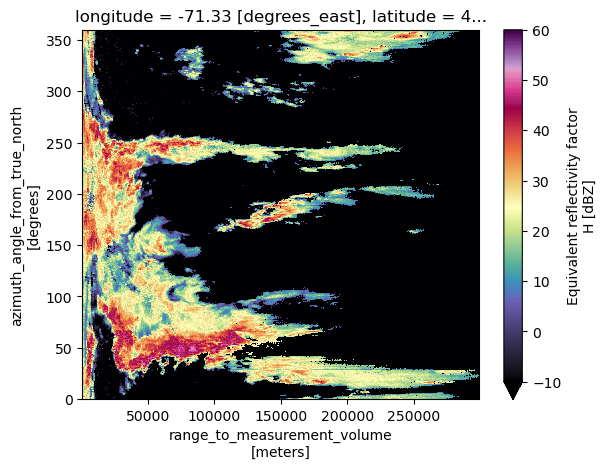

In [6]:
# importamos cmweather para acceder a la paleta "ChaseSpectral"
import cmweather


radar_xd["sweep_0"]["DBZH"].plot(
    cmap="ChaseSpectral", 
    vmin=-10, 
    vmax=60
);

Este gráfico muestra los datos en una cuadrícula rectangular, con `azimuth` en el eje vertical y `range` en el eje horizontal.
No representa una vista polar ni georreferenciada.

:::{admonition} 🔎 Nota importante

Nuestro `DataArray `tiene como dimensiones `azimuth` y `range` , por lo que la visualización por defecto es una malla rectangular.
Para representar los datos en coordenadas cartesianas relativas al radar (por ejemplo en kilómetros desde el centro del radar), debemos aplicar georreferenciación.


#### 🌍 Visualización georreferenciada (`x`, `y`, `z`)

Para obtener una vista espacial, primero aplicamos georreferenciación al volumen usando:

In [7]:
radar_geo = radar_xd.xradar.georeference()
radar_geo["sweep_0"]

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:            (sweep: 1, azimuth: 720, range: 994)
    Coordinates:
        elevation          (azimuth) float64 6kB 0.4779 0.4779 ... 0.4779 0.4779
        time               (azimuth) datetime64[ns] 6kB 2022-08-09T19:15:56.89100...
      * range              (range) float32 4kB 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
        longitude          float64 8B -71.33
        latitude           float64 8B 4.564
        altitude           float64 8B 206.0
      * azimuth            (azimuth) float32 3kB 0.03571 0.5795 ... 359.0 359.6
        crs_wkt            int64 8B 0
        x                  (azimuth, range) float64 6MB 0.6231 0.8101 ... -2.191e+03
        y                  (azimuth, range) float64 6MB 999.9 1.3e+03 ... 2.987e+05
        z                  (azimuth, range) float64 6MB 214.4 216.9 ... 7.948e+03
    Dimensions without coordinates: sweep
    Data variables: (12/17)
        DBTH               (azimuth, range) float32 3MB ...
        DBZH               (azimuth, range) float32 3MB ...
        VRADH              (azimuth, range) float32 3MB ...
        WRADH              (azimuth, range) float32 3MB ...
        ZDR                (azimuth, range) float32 3MB ...
        KDP                (azimuth, range) float32 3MB ...
        ...                 ...
        DB_DBZE8           (azimuth, range) float32 3MB ...
        sweep_mode         <U20 80B ...
        sweep_number       int64 8B ...
        prt_mode           <U7 28B ...
        follow_mode        <U7 28B ...
        sweep_fixed_angle  float64 8B ...

Esto agrega coordenadas espaciales (`x`, `y` y `z`) a los datos, permitiendo representarlos en un plano cartesiano relativo a la posición del radar.

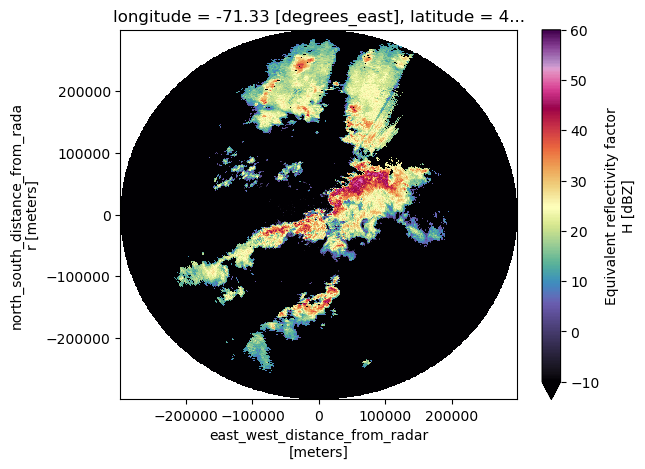

In [8]:
radar_geo["sweep_0"]["DBZH"].plot(
    x="x", 
    y="y", 
    cmap="ChaseSpectral", 
    vmin=-10, 
    vmax=60
);


Ahora sí obtenemos una vista más representativa de la escena observada por el radar, ideal para análisis geoespaciales.

### 3.6 ✂️ Selección de datos (Slicing)

Una vez que tenemos los datos georreferenciados, podemos aprovechar las coordenadas para seleccionar subconjuntos específicos, por ejemplo:

- Un rango de ángulos (`azimuth`)
- Una distancia determinada (`range`)
- O incluso combinaciones de ambas

Esto es útil para enfocar el análisis en una región particular del barrido de radar.


#### 🔍 Selección por rango de ángulos

Supongamos que queremos visualizar los datos entre 40° y 120° de azimuth:


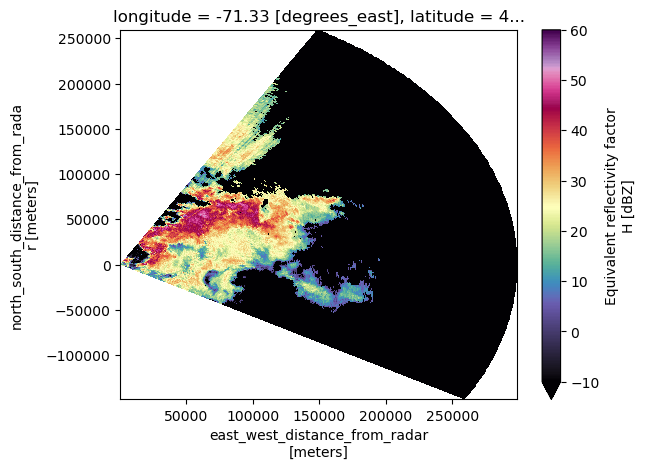

In [9]:
radar_geo["sweep_0"]["DBZH"].sel(
    azimuth=slice(30, 120)
).plot(
    x="x", 
    y="y", 
    cmap="ChaseSpectral", 
    vmin=-10, 
    vmax=60
);

#### 📏 Selección por distancia (`range`)

También podemos limitar la visualización a una distancia máxima, por ejemplo, los primeros 100 km desde el radar:


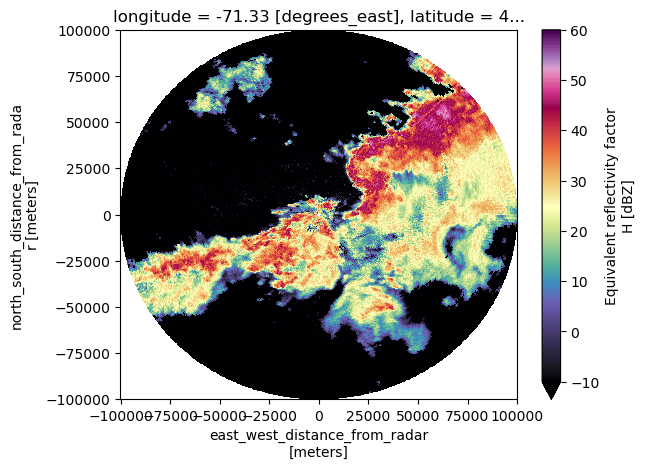

In [10]:
radar_geo["sweep_0"]["DBZH"].sel(
    range=slice(0, 100_000)
).plot(
    x="x", 
    y="y", 
    cmap="ChaseSpectral", 
    vmin=-10, 
    vmax=60
);

#### 🔍 Selección combinada de `azimuth` y `range`
Las selecciones se pueden combinar fácilmente. Por ejemplo, un sector de 20° a 120° de azimuth y un rango de 25 hasta 50 km:

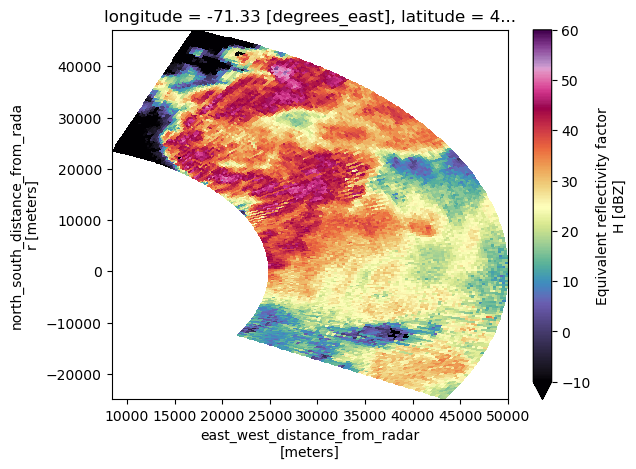

In [11]:
radar_geo["sweep_0"]["DBZH"].sel(
    azimuth=slice(20, 120),
    range=slice(25_000, 50_000)
).plot(x="x", 
       y="y", 
       cmap="ChaseSpectral", 
       vmin=-10, 
       vmax=60
      );

Estas herramientas de **slicing** te permiten reducir el volumen de datos visualizado o analizado, y son especialmente útiles para estudios de casos puntuales o fenómenos meteorológicos localizados.

#### 📡 Corte radial en un solo azimuth

También podemos visualizar cómo varía la reflectividad a lo largo del **rango** para un solo valor de **azimuth**. Esto permite observar el perfil horizontal de reflectividad en una dirección específica:

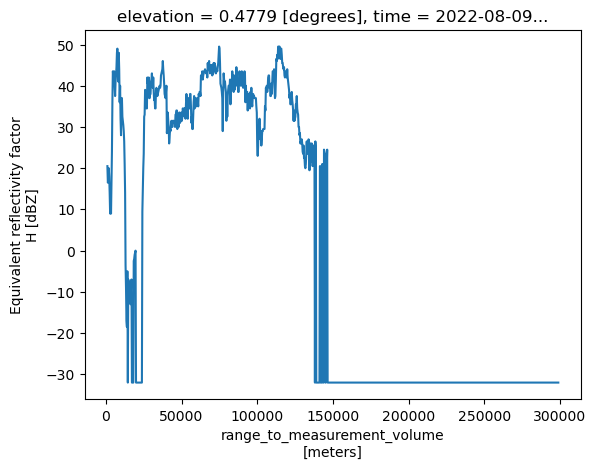

In [12]:
radar_xd["sweep_0"]["DBZH"].sel(azimuth=55, method="nearest").plot();

### 3.6 Acceso y visualización de variables polarimétricas 🌈

Además de la reflectividad (`DBZH`), los radares polarimétricos generan otras variables que nos permiten obtener más información sobre el tipo de precipitación, el tamaño de las gotas, o la presencia de granizo.


#### 🎨 Reflectividad Diferencial (ZDR)

`ZDR` compara la señal horizontal vs. vertical del radar. Valores positivos indican gotas achatadas (lluvia), mientras que valores cercanos a cero o negativos pueden estar asociados con granizo o nieve.

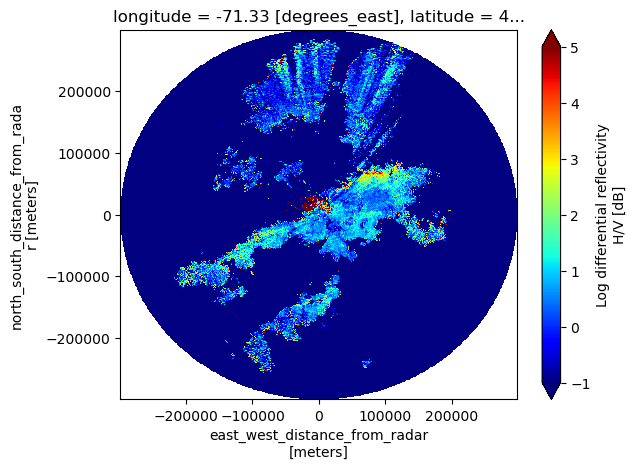

In [13]:
radar_xd["sweep_0"]["ZDR"].plot(
    x="x", y="y",
    cmap="jet",
    vmin=-1, vmax=5,
);

#### 💨 Velocidad radial (VRADH)

`VRADH` representa la componente del viento en dirección del haz del radar. Los valores negativos indican acercamiento hacia el radar, y positivos, alejamiento. Este producto es clave para estimar flujos de viento, vórtices o firmas de tornados.



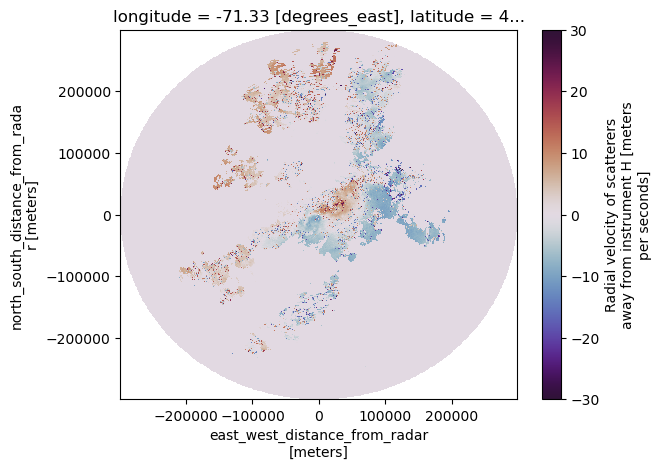

In [14]:
radar_xd["sweep_0"]["VRADH"].plot(
    x="x", y="y",
    cmap="twilight_shifted",
    vmin=-30,
    vmax=30,
);

### 3.7 Exportar el árbol completo como Zarr 💾

Una vez que los datos del radar han sido organizados en un objeto `xarray.DataTree` utilizando `Xradar`, podemos exportar toda la estructura —incluyendo metadatos, barridos y jerarquías— en un solo paso usando el formato **Zarr versión 2**.

---

#### 💡 ¿Por qué usar Zarr?

Zarr es un formato de almacenamiento optimizado para:

- Grandes volúmenes de datos multidimensionales
- Acceso paralelo y distribuido (ideal para HPC o la nube)
- Integración con herramientas como **xarray**, **dask**, y **kerchunk**
- Almacenamiento en buckets como S3 o GCS


#### 💾 Guardar el `DataTree` completo en Zarr

In [15]:
# Exportar todo el árbol jerárquico en formato Zarr versión 2
radar_xd.to_zarr("../data/radar.zarr", mode="w", zarr_version=2)

📁 Esto creará una carpeta `radar.zarr` con todos los niveles de metadatos y datos individuales, estructurados según el modelo FM301/CfRadial2.1.


#### 📥 Leer nuevamente el archivo Zarr
Podemos traer los datos devuelta de la siguiente manera

In [16]:
import xarray as xr

# Cargar el DataTree desde Zarr
radar_zarr = xr.open_datatree("../data/radar.zarr")
radar_zarr

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 1)
│   Dimensions without coordinates: sweep
│   Data variables:
│       instrument_type      <U5 20B ...
│       latitude             float64 8B ...
│       altitude             float64 8B ...
│       longitude            float64 8B ...
│       platform_type        <U5 20B ...
│       time_coverage_end    <U20 80B ...
│       sweep_group_name     (sweep) int64 8B ...
│       time_coverage_start  <U20 80B ...
│       sweep_fixed_angle    (sweep) float64 8B ...
│       volume_number        int64 8B ...
│   Attributes:
│       Conventions:      None
│       instrument_name:  carimagua-radar
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           Sigmet
│       history:          None
│       comment:          Primera tarea del modo precipitacion / 0.5
│       scan_name:        SURVP       
├── Group: /georeferencing_correction
│       Dimensions:    ()
│       Coordinates:
│           latitude   float64 8B ...
│           altitude   float64 8B ...
│           longitude  float64 8B ...
├── Group: /radar_calibration
├── Group: /radar_parameters
│       Dimensions:    ()
│       Coordinates:
│           altitude   float64 8B ...
│           latitude   float64 8B ...
│           longitude  float64 8B ...
└── Group: /sweep_0
        Dimensions:            (azimuth: 720, range: 994)
        Coordinates:
          * azimuth            (azimuth) float32 3kB 0.03571 0.5795 ... 359.0 359.6
            altitude           float64 8B ...
            crs_wkt            int64 8B ...
            elevation          (azimuth) float32 3kB ...
            latitude           float64 8B ...
            longitude          float64 8B ...
          * range              (range) float32 4kB 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
            time               (azimuth) datetime64[ns] 6kB ...
            z                  (azimuth, range) float64 6MB ...
            y                  (azimuth, range) float64 6MB ...
            x                  (azimuth, range) float64 6MB ...
        Data variables: (12/17)
            DB_HCLASS          (azimuth, range) int16 1MB ...
            DBTH               (azimuth, range) float32 3MB ...
            DBZH               (azimuth, range) float32 3MB ...
            DB_DBTE8           (azimuth, range) float32 3MB ...
            DB_DBZE8           (azimuth, range) float32 3MB ...
            follow_mode        <U7 28B ...
            ...                 ...
            sweep_fixed_angle  float64 8B ...
            sweep_mode         <U20 80B ...
            sweep_number       int64 8B ...
            VRADH              (azimuth, range) float32 3MB ...
            ZDR                (azimuth, range) float32 3MB ...
            WRADH              (azimuth, range) float32 3MB ...

Con esta estructura jerárquica puedes navegar entre los distintos barridos (sweep_0, sweep_1, etc.), acceder a sus variables, y trabajar con los datos de manera eficiente.

---

## ✅ Conclusiones

En este cuadernillo exploramos el uso de **Xradar**, una librería clave en el ecosistema de ciencia abierta para datos de radar meteorológico.

🔍 A lo largo del módulo, aprendiste a:

- Leer datos en formato SIGMET/IRIS usando `open_iris_datatree`.
- Explorar la estructura jerárquica `xarray.DataTree` compatible con el modelo FM301/CfRadial2.1.
- Acceder a variables individuales (`DBZH`, `ZDR`, `VRADH`, etc.) y sus metadatos.
- Visualizar datos radar de forma rápida, tanto en coordenadas de radar como en coordenadas georreferenciadas.
- Realizar slicing y filtrado de datos usando coordenadas físicas (`azimuth`, `range`, `x`, `y`).
- Exportar datos a formato **Zarr**, optimizado para procesamiento distribuido y almacenamiento en la nube.

📘 **¿Qué sigue?**

Ahora que dominas el uso de Xradar como punto de entrada, puedes explorar librerías complementarias como:

- [`Py-ART`](https://arm-doe.github.io/pyart/): para procesamiento avanzado, correcciones y análisis estadístico.
- [`Wradlib`](https://docs.wradlib.org/): para procesamiento físico, filtrado y estimación cuantitativa de precipitación.
- [`Radar Cookbook`](https://doi.org/10.5281/zenodo.8075855): Para conocer mas sobre como usar Py-ART
- Herramientas geoespaciales como `cartopy` y `geopandas` para generar mapas y análisis geográficos.

🛰️ **Xradar te ofrece una base sólida y reproducible para el análisis moderno de radar meteorológico.**
